# **Python Project Template**

####Based on Chapter 18. Predictive Modeling Project Template
####of *Machne Learning Mastery with Python*
####by Dr. Jason Brownlee

# Six common tasks for a predictive modeling machine learning project
## 1. Define Problem
## 2. Summarize Data
## 3. Prepare Data
## 4. Evaluate Algorithms
## 5. Improve Results
## 6. Present Results

# **1. Prepare Problem**
## a) Load libraries

In [ ]:
# Required installation
# ! pip install matplotlib
# ! pip install seaborn
# ! pip install plotly
# ! pip install sklearn 

In [1]:
# Mount google drive
from google.colab import drive

drive.mount('/content/drive')

In [2]:
# Python libraries
# Classic,data manipulation and linear algebra
import pandas as pd
import numpy as np

# Plots
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.tools as tls
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)

# Data processing, metrics and modeling
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix,accuracy_score,f1_score
from sklearn.model_selection import KFold

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

# Stats
import scipy.stats as ss
from scipy import interp
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

# Time
from contextlib import contextmanager
@contextmanager
def timer(title):
    t0 = time.time()
    yield
    print("{} - done in {:.0f}s".format(title, time.time() - t0))

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore') 

# b) Load dataset

In [3]:
##Load the dataset
#df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/temp/diabetes.csv')

#Print the first 5 rows of the dataframe.
#df.head()

url = "https://raw.githubusercontent.com/rrichajalota/Pima-Indians-Diabetes-kaggle/master/diabetes.csv"
path = '/content/drive/My Drive/Colab Notebooks/temp/'
filename = 'diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

dataset = read_csv(path+filename)
# dataset = pd.read_csv("../diabetes.csv")
data = dataset
array = dataset.values
X = array[:,0:8]
y = array[:,8]

In [4]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# **2. Summarize Data**

In [5]:
# Summarize Data
pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 100)

# a) Descriptive statistics

In [6]:
print("shape of dataset:",data.shape)

shape of dataset: (768, 9)


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


##### - There are no null values
##### - 2 float64 features
##### - 7 int64 features

In [8]:
# data description
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


##### We saw on Description that some features contain 0, it doesn't make sense here and this indicates missing value.

### Finding missing values

# b) Data visualizations

# **3. Prepare Data**
## a) Data Cleaning with EDA

In [9]:
# 2 datasets
D = data[(data['Outcome'] != 0)]
H = data[(data['Outcome'] == 0)]

#------------COUNT-----------------------
def target_count():
    trace = go.Bar( x = data['Outcome'].value_counts().values.tolist(), 
                    y = ['healthy','diabetic' ], 
                    orientation = 'h', 
                    text=data['Outcome'].value_counts().values.tolist(), 
                    textfont=dict(size=15),
                    textposition = 'auto',
                    opacity = 0.8,marker=dict(
                    color=['lightskyblue', 'gold'],
                    line=dict(color='#000000',width=1.5)))

    layout = dict(title =  'Count of Outcome variable')

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)

#------------PERCENTAGE-------------------
def target_percent():
    trace = go.Pie(labels = ['healthy','diabetic'], values = data['Outcome'].value_counts(), 
                   textfont=dict(size=15), opacity = 0.8,
                   marker=dict(colors=['lightskyblue', 'gold'], 
                               line=dict(color='#000000', width=1.5)))


    layout = dict(title =  'Distribution of Outcome variable')

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)

In [10]:
target_count()
target_percent()

We saw on data.head() that some features contain 0, it doesn't make sense here and this indicates missing value Below we replace 0 value by NaN :

In [11]:
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [12]:
# missing values
data.isnull().sum().sort_values(ascending=False)*100/data.shape[0]

Insulin                     48.697917
SkinThickness               29.557292
BloodPressure                4.557292
BMI                          1.432292
Glucose                      0.651042
Pregnancies                  0.000000
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

#### Missing values :

- Insulin = 48.7% - 374
- SkinThickness = 29.56% - 227
- BloodPressure = 4.56% - 35
- BMI = 1.43% - 11
- Glucose = 0.65% - 5

In [13]:
def correlation_plot():
    #correlation
    correlation = data.corr()
    #tick labels
    matrix_cols = correlation.columns.tolist()
    #convert to array
    corr_array  = np.array(correlation)
    trace = go.Heatmap(z = corr_array,
                       x = matrix_cols,
                       y = matrix_cols,
                       colorscale='Viridis',
                       colorbar   = dict() ,
                      )
    layout = go.Layout(dict(title = 'Correlation Matrix for variables',
                            #autosize = False,
                            #height  = 1400,
                            #width   = 1600,
                            margin  = dict(r = 0 ,l = 100,
                                           t = 0,b = 100,
                                         ),
                            yaxis   = dict(tickfont = dict(size = 9)),
                            xaxis   = dict(tickfont = dict(size = 9)),
                           )
                      )
    fig = go.Figure(data = [trace],layout = layout)
    py.iplot(fig)


A correlation matrix is a table showing correlation coefficients between sets of variables. Each random variable (Xi) in the table is correlated with each of the other values in the table (Xj). This allows you to see which pairs have the highest correlation.

In [14]:
correlation_plot()

Below, you can see the accuracy of LGBM with replacement of the NaN values by the variable's mean (same results with the median)

In [15]:
def median_target(var):   
    temp = data[data[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

## b) Feature Selection

### 1. Insulin : 2-Hour serum insulin (mu U/ml)

In [16]:
def plot_distribution(data_select, size_bin) :  
    # 2 datasets
    tmp1 = D[data_select]
    tmp2 = H[data_select]
    hist_data = [tmp1, tmp2]
    
    group_labels = ['diabetic', 'healthy']
    colors = ['#FFD700', '#7EC0EE']

    fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, bin_size = size_bin, curve_type='kde')
    
    fig['layout'].update(title = data_select)

    py.iplot(fig, filename = 'Density plot')

In [17]:
plot_distribution('Insulin', 0)

In [18]:
median_target('Insulin')

,Outcome,Insulin
0,0,102.5
1,1,169.5


- Insulin's medians by the target are really different ! 
- 102.5 for a healthy person and 169.5 for a diabetic person

In [19]:
data.loc[(data['Outcome'] == 0 ) & (data['Insulin'].isnull()), 'Insulin'] = 102.5
data.loc[(data['Outcome'] == 1 ) & (data['Insulin'].isnull()), 'Insulin'] = 169.5

### 2. Glucose : Plasma glucose concentration a 2 hours in an oral glucose tolerance test

In [20]:
plot_distribution('Glucose', 0)

In [21]:
median_target('Glucose')

,Outcome,Glucose
0,0,107.0
1,1,140.0


In [22]:
data.loc[(data['Outcome'] == 0 ) & (data['Glucose'].isnull()), 'Glucose'] = 107
data.loc[(data['Outcome'] == 1 ) & (data['Glucose'].isnull()), 'Glucose'] = 140

107 for a healthy person and 140 for a diabetic person

### 3. SkinThickness : Triceps skin fold thickness (mm)

In [23]:
plot_distribution('SkinThickness', 10)

In [24]:
median_target('SkinThickness')

,Outcome,SkinThickness
0,0,27.0
1,1,32.0


In [25]:
data.loc[(data['Outcome'] == 0 ) & (data['SkinThickness'].isnull()), 'SkinThickness'] = 27
data.loc[(data['Outcome'] == 1 ) & (data['SkinThickness'].isnull()), 'SkinThickness'] = 32

27 for a healthy person and 32 for a diabetic person

### 4. BloodPressure : Diastolic blood pressure (mm Hg)

In [26]:
plot_distribution('BloodPressure', 5)

In [27]:
median_target('BloodPressure')

,Outcome,BloodPressure
0,0,70.0
1,1,74.5


In [28]:
data.loc[(data['Outcome'] == 0 ) & (data['BloodPressure'].isnull()), 'BloodPressure'] = 70
data.loc[(data['Outcome'] == 1 ) & (data['BloodPressure'].isnull()), 'BloodPressure'] = 74.5

### 5. BMI : Body mass index (weight in kg/(height in m)^2)

In [29]:
plot_distribution('BMI', 0)

In [30]:
median_target('BMI')

,Outcome,BMI
0,0,30.1
1,1,34.3


In [31]:
data.loc[(data['Outcome'] == 0 ) & (data['BMI'].isnull()), 'BMI'] = 30.1
data.loc[(data['Outcome'] == 1 ) & (data['BMI'].isnull()), 'BMI'] = 34.3

- Age : Age (years)
- DiabetesPedigreeFunction : Diabetes pedigree function
- Pregnancies : Number of times pregnant

In [32]:
#plot distribution 
plot_distribution('Age', 0)
plot_distribution('Pregnancies', 0)
plot_distribution('DiabetesPedigreeFunction', 0)

All features are complete ! Now, we can create new features

In [33]:
def plot_feat1_feat2(feat1, feat2) :  
    D = data[(data['Outcome'] != 0)]
    H = data[(data['Outcome'] == 0)]
    trace0 = go.Scatter(
        x = D[feat1],
        y = D[feat2],
        name = 'diabetic',
        mode = 'markers', 
        marker = dict(color = '#FFD700',
            line = dict(
                width = 1)))

    trace1 = go.Scatter(
        x = H[feat1],
        y = H[feat2],
        name = 'healthy',
        mode = 'markers',
        marker = dict(color = '#7EC0EE',
            line = dict(
                width = 1)))

    layout = dict(title = feat1 +" "+"vs"+" "+ feat2,
                  yaxis = dict(title = feat2,zeroline = False),
                  xaxis = dict(title = feat1, zeroline = False)
                 )

    plots = [trace0, trace1]

    fig = dict(data = plots, layout=layout)
    py.iplot(fig)


In [34]:
def barplot(var_select, sub) :
    tmp1 = data[(data['Outcome'] != 0)]
    tmp2 = data[(data['Outcome'] == 0)]
    tmp3 = pd.DataFrame(pd.crosstab(data[var_select],data['Outcome']), )
    tmp3['% diabetic'] = tmp3[1] / (tmp3[1] + tmp3[0]) * 100

    color=['lightskyblue','gold' ]
    trace1 = go.Bar(
        x=tmp1[var_select].value_counts().keys().tolist(),
        y=tmp1[var_select].value_counts().values.tolist(),
        text=tmp1[var_select].value_counts().values.tolist(),
        textposition = 'auto',
        name='diabetic',opacity = 0.8, marker=dict(
        color='gold',
        line=dict(color='#000000',width=1)))

    
    trace2 = go.Bar(
        x=tmp2[var_select].value_counts().keys().tolist(),
        y=tmp2[var_select].value_counts().values.tolist(),
        text=tmp2[var_select].value_counts().values.tolist(),
        textposition = 'auto',
        name='healthy', opacity = 0.8, marker=dict(
        color='lightskyblue',
        line=dict(color='#000000',width=1)))
    
    trace3 =  go.Scatter(   
        x=tmp3.index,
        y=tmp3['% diabetic'],
        yaxis = 'y2',
        name='% diabetic', opacity = 0.6, marker=dict(
        color='black',
        line=dict(color='#000000',width=0.5
        )))

    layout = dict(title =  str(var_select)+' '+(sub),
              xaxis=dict(), 
              yaxis=dict(title= 'Count'), 
              yaxis2=dict(range= [-0, 75], 
                          overlaying= 'y', 
                          anchor= 'x', 
                          side= 'right',
                          zeroline=False,
                          showgrid= False, 
                          title= '% diabetic'
                         ))

    fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
    py.iplot(fig)

In [35]:
# Define pie plot to visualize each variable repartition vs target modalities : Survived or Died (train)
def plot_pie(var_select, sub) :
    D = data[(data['Outcome'] != 0)]
    H = data[(data['Outcome'] == 0)]
    
    col =['Silver', 'mediumturquoise','#CF5C36','lightblue','magenta', '#FF5D73','#F2D7EE','mediumturquoise']
    
    trace1 = go.Pie(values  = D[var_select].value_counts().values.tolist(),
                    labels  = D[var_select].value_counts().keys().tolist(),
                    textfont=dict(size=15), opacity = 0.8,
                    hole = 0.5, 
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [.0,.48]),
                    name    = "Diabetic",
                    marker  = dict(colors = col, line = dict(width = 1.5)))
    trace2 = go.Pie(values  = H[var_select].value_counts().values.tolist(),
                    labels  = H[var_select].value_counts().keys().tolist(),
                    textfont=dict(size=15), opacity = 0.8,
                    hole = 0.5,
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 1.5)),
                    domain  = dict(x = [.52,1]),
                    name    = "Healthy" )

    layout = go.Layout(dict(title = var_select + " distribution by target <br>"+(sub),
                            annotations = [ dict(text = "Diabetic"+" : "+"268",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .22, y = -0.1),
                                            dict(text = "Healthy"+" : "+"500",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .8,y = -.1)]))
                                          

    fig  = go.Figure(data = [trace1,trace2],layout = layout)
    py.iplot(fig)

- Glucose and Age

In [36]:
plot_feat1_feat2('Glucose','Age')

Healthy persons are concentrate with an age <= 30 and glucose <= 120

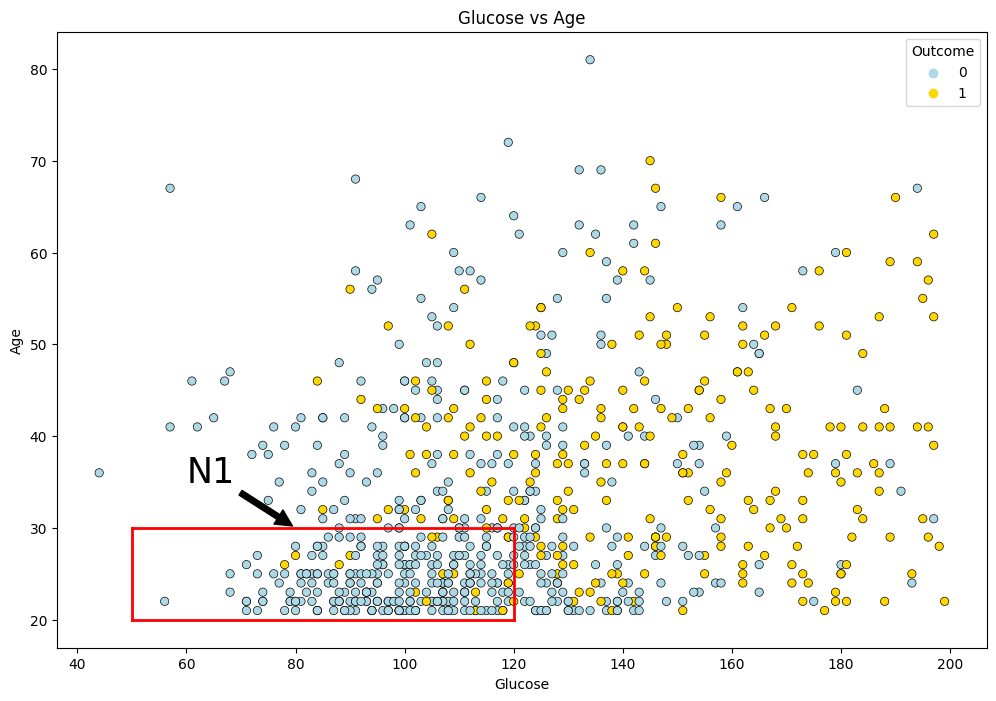

In [37]:
palette ={0 : 'lightblue', 1 : 'gold'}
edgecolor = 'black'

fig = plt.figure(figsize=(12,8))

ax1 = sns.scatterplot(x = data['Glucose'], y = data['Age'], hue = "Outcome",
                    data = data, palette = palette, edgecolor=edgecolor)

plt.annotate('N1', size=25, color='black', xy=(80, 30), xytext=(60, 35),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.plot([50, 120], [30, 30], linewidth=2, color = 'red')
plt.plot([120, 120], [20, 30], linewidth=2, color = 'red')
plt.plot([50, 120], [20, 20], linewidth=2, color = 'red')
plt.plot([50, 50], [20, 30], linewidth=2, color = 'red')
plt.title('Glucose vs Age')
plt.show()

In [38]:
data.loc[:,'N1']=0
data.loc[(data['Age']<=30) & (data['Glucose']<=120),'N1']=1

In [39]:
barplot('N1', ':Glucose <= 120 and Age <= 30')

In [40]:
plot_pie('N1', '(Glucose <= 120 and Age <= 30)')

- BMI

In [41]:
data.loc[:,'N2']=0
data.loc[(data['BMI']<=30),'N2']=1

In [42]:
barplot('N2', ': BMI <= 30')

In [43]:
plot_pie('N2', 'BMI <= 30')

- Pregnancies and Age

In [44]:
plot_feat1_feat2('Pregnancies','Age')

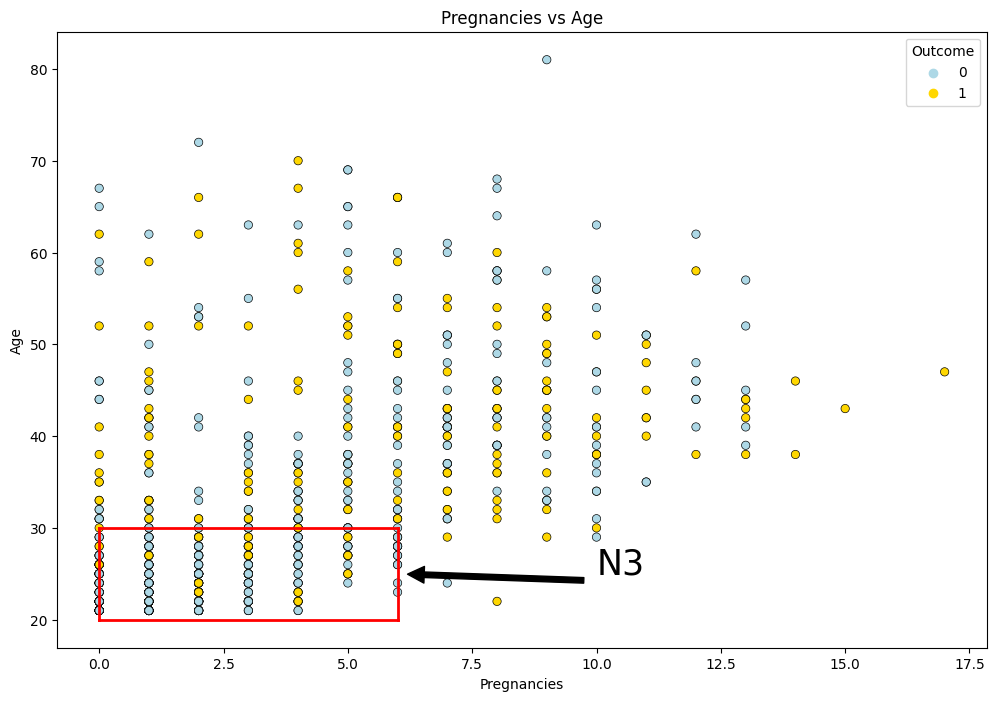

In [45]:
palette ={0 : 'lightblue', 1 : 'gold'}
edgecolor = 'black'

fig = plt.figure(figsize=(12,8))

ax1 = sns.scatterplot(x = data['Pregnancies'], y = data['Age'], hue = "Outcome",
                    data = data, palette = palette, edgecolor=edgecolor)

plt.annotate('N3', size=25, color='black', xy=(6, 25), xytext=(10, 25),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.plot([0, 6], [30, 30], linewidth=2, color = 'red')
plt.plot([6, 6], [20, 30], linewidth=2, color = 'red')
plt.plot([0, 6], [20, 20], linewidth=2, color = 'red')
plt.plot([0, 0], [20, 30], linewidth=2, color = 'red')
plt.title('Pregnancies vs Age')
plt.show()

In [46]:
data.loc[:,'N3']=0
data.loc[(data['Age']<=30) & (data['Pregnancies']<=6),'N3']=1

In [47]:
barplot('N3', ': Age <= 30 and Pregnancies <= 6')

In [48]:
plot_pie('N3', 'Age <= 30 and Pregnancies <= 6')

- Glucose and BloodPressure

In [49]:
plot_feat1_feat2('Glucose','BloodPressure')

Healthy persons are concentrate with an blood pressure <= 80 and glucose <= 105

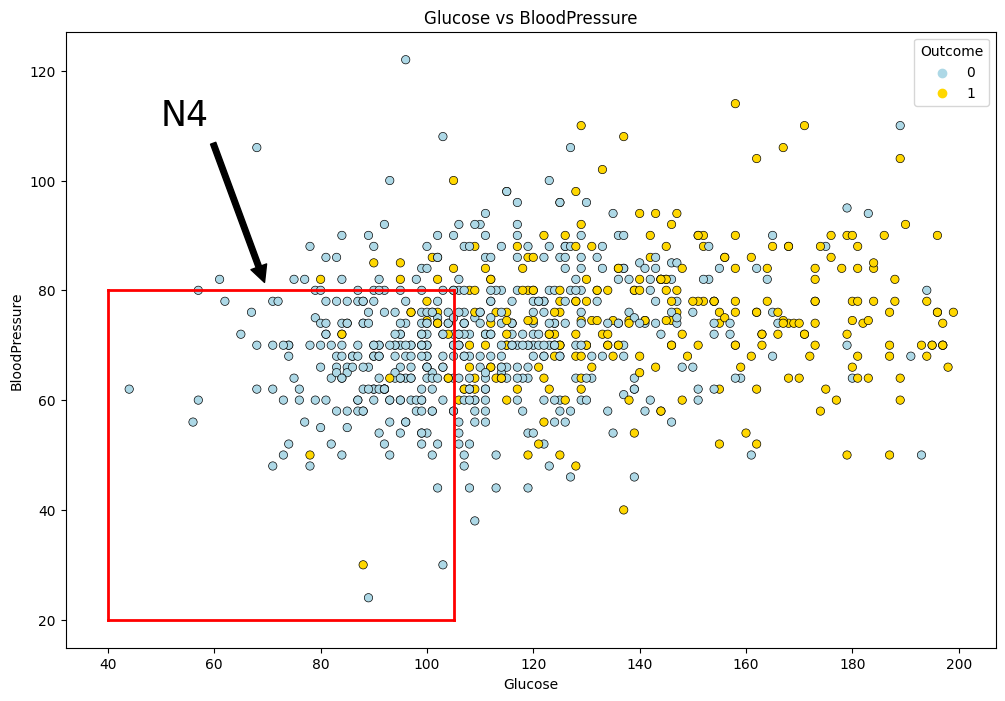

In [50]:
palette ={0 : 'lightblue', 1 : 'gold'}
edgecolor = 'black'

fig = plt.figure(figsize=(12,8))

ax1 = sns.scatterplot(x = data['Glucose'], y = data['BloodPressure'], hue = "Outcome",
                    data = data, palette = palette, edgecolor=edgecolor)

plt.annotate('N4', size=25, color='black', xy=(70, 80), xytext=(50, 110),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.plot([40, 105], [80, 80], linewidth=2, color = 'red')
plt.plot([40, 40], [20, 80], linewidth=2, color = 'red')
plt.plot([40, 105], [20, 20], linewidth=2, color = 'red')
plt.plot([105, 105], [20, 80], linewidth=2, color = 'red')
plt.title('Glucose vs BloodPressure')
plt.show()

In [51]:
data.loc[:,'N4']=0
data.loc[(data['Glucose']<=105) & (data['BloodPressure']<=80),'N4']=1

In [52]:
barplot('N4', ': Glucose <= 105 and BloodPressure <= 80')

In [53]:
plot_pie('N4', 'Glucose <= 105 and BloodPressure <= 80')

- SkinThickness

In [54]:
data.loc[:,'N5']=0
data.loc[(data['SkinThickness']<=20) ,'N5']=1

In [55]:
barplot('N5', ':SkinThickness <= 20')

In [56]:
plot_pie('N5', 'SkinThickness <= 20')

- SkinThickness and BMI

In [57]:
plot_feat1_feat2('SkinThickness','BMI')

Healthy persons are concentrate with a BMI < 30 and skin thickness <= 20

In [58]:
data.loc[:,'N6']=0
data.loc[(data['BMI']<30) & (data['SkinThickness']<=20),'N6']=1

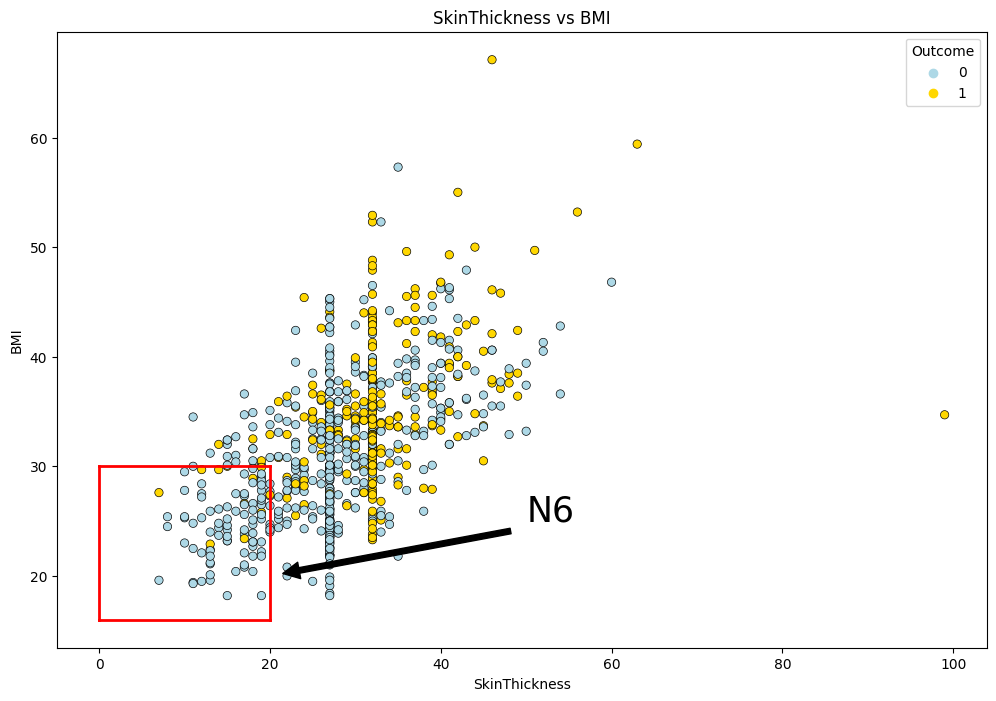

In [59]:
palette ={0 : 'lightblue', 1 : 'gold'}
edgecolor = 'black'

fig = plt.figure(figsize=(12,8))

ax1 = sns.scatterplot(x = data['SkinThickness'], y = data['BMI'], hue = "Outcome",
                    data = data, palette = palette, edgecolor=edgecolor)

plt.annotate('N6', size=25, color='black', xy=(20, 20), xytext=(50, 25),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.plot([0, 20], [30, 30], linewidth=2, color = 'red')
plt.plot([0, 0], [16, 30], linewidth=2, color = 'red')
plt.plot([0, 20], [16, 16], linewidth=2, color = 'red')
plt.plot([20, 20], [16, 30], linewidth=2, color = 'red')
plt.title('SkinThickness vs BMI')
plt.show()

In [60]:
barplot('N6', ': BMI < 30 and SkinThickness <= 20')

In [61]:
plot_pie('N6', 'BMI < 30 and SkinThickness <= 20')

- Glucose and BMI

In [62]:
plot_feat1_feat2('Glucose','BMI')

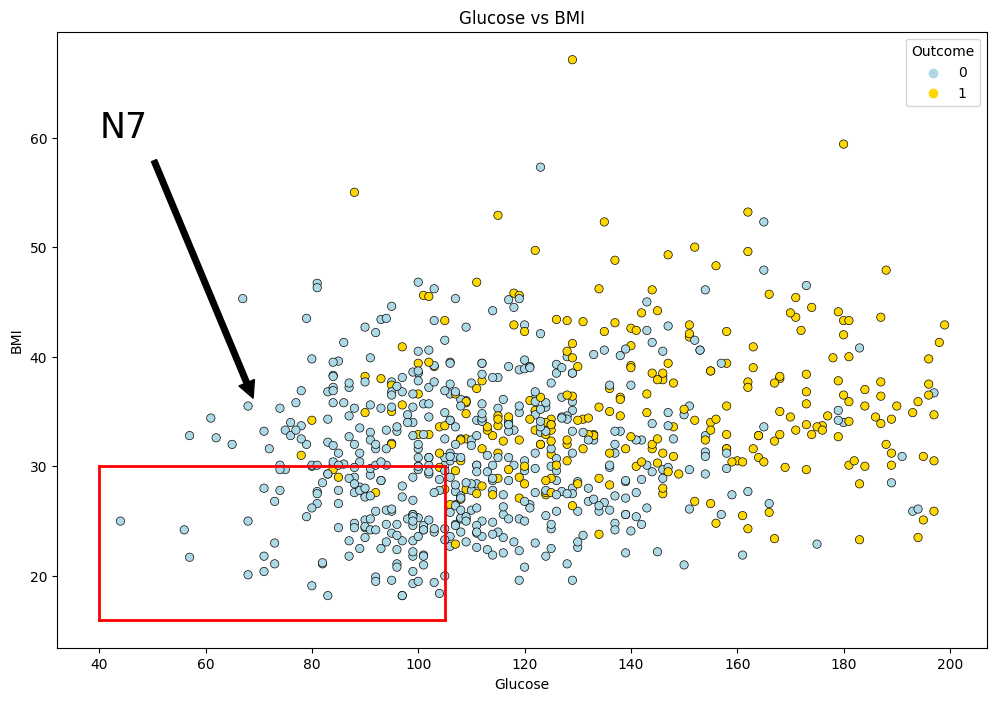

In [63]:
palette ={0 : 'lightblue', 1 : 'gold'}
edgecolor = 'black'

fig = plt.figure(figsize=(12,8))

ax1 = sns.scatterplot(x = data['Glucose'], y = data['BMI'], hue = "Outcome",
                    data = data, palette = palette, edgecolor=edgecolor)

plt.annotate('N7', size=25, color='black', xy=(70, 35), xytext=(40, 60),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.plot([105, 105], [16, 30], linewidth=2, color = 'red')
plt.plot([40, 40], [16, 30], linewidth=2, color = 'red')
plt.plot([40, 105], [16, 16], linewidth=2, color = 'red')
plt.plot([40, 105], [30, 30], linewidth=2, color = 'red')
plt.title('Glucose vs BMI')
plt.show()

In [64]:
data.loc[:,'N7']=0
data.loc[(data['Glucose']<=105) & (data['BMI']<=30),'N7']=1

In [65]:
barplot('N7', ': Glucose <= 105 and BMI <= 30')

In [66]:
plot_pie('N7', 'Glucose <= 105 and BMI <= 30')

- Insulin

In [67]:
plot_distribution('Insulin', 0)

In [68]:
data.loc[:,'N9']=0
data.loc[(data['Insulin']<200),'N9']=1

In [69]:
barplot('N9', ': Insulin < 200')

In [70]:
plot_pie('N9', 'Insulin < 200')

- BloodPressure

In [71]:
data.loc[:,'N10']=0
data.loc[(data['BloodPressure']<80),'N10']=1

In [72]:
barplot('N10', ': BloodPressure < 80')

In [73]:
plot_pie('N10', 'BloodPressure < 80')

- Pregnancies

In [74]:
plot_distribution('Pregnancies', 0)

In [75]:
data.loc[:,'N11']=0
data.loc[(data['Pregnancies']<4) & (data['Pregnancies']!=0) ,'N11']=1

In [76]:
barplot('N11', ': Pregnancies > 0 and < 4')

In [77]:
plot_pie('N11', 'Pregnancies > 0 and < 4')

- Others

In [78]:
data['N0'] = data['BMI'] * data['SkinThickness']

data['N8'] =  data['Pregnancies'] / data['Age']

data['N13'] = data['Glucose'] / data['DiabetesPedigreeFunction']

data['N12'] = data['Age'] * data['DiabetesPedigreeFunction']

data['N14'] = data['Age'] / data['Insulin']

In [79]:
D = data[(data['Outcome'] != 0)]
H = data[(data['Outcome'] == 0)]

In [80]:
plot_distribution('N0', 0)

In [81]:
data.loc[:,'N15']=0
data.loc[(data['N0']<1034) ,'N15']=1

In [82]:
barplot('N15', ': N0 < 1034')

In [83]:
plot_pie('N15', 'N0 < 1034')

## c) Data Transforms

In [84]:
target_col = ["Outcome"]
cat_cols   = data.nunique()[data.nunique() < 12].keys().tolist()
cat_cols   = [x for x in cat_cols ]
#numerical columns
num_cols   = [x for x in data.columns if x not in cat_cols + target_col]
#Binary columns with 2 values
bin_cols   = data.nunique()[data.nunique() == 2].keys().tolist()
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    data[i] = le.fit_transform(data[i])
    
#Duplicating columns for multi value columns
data = pd.get_dummies(data = data,columns = multi_cols )

#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(data[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

#dropping original values merging scaled values for numerical columns
df_data_og = data.copy()
data = data.drop(columns = num_cols,axis = 1)
data = data.merge(scaled,left_index=True,right_index=True,how = "left")

In [85]:
def correlation_plot():
    #correlation
    correlation = data.corr()
    #tick labels
    matrix_cols = correlation.columns.tolist()
    #convert to array
    corr_array  = np.array(correlation)
    trace = go.Heatmap(z = corr_array,
                       x = matrix_cols,
                       y = matrix_cols,
                       colorscale='Viridis',
                       colorbar   = dict() ,
                      )
    layout = go.Layout(dict(title = 'Correlation Matrix for variables',
                            #autosize = False,
                            #height  = 1400,
                            #width   = 1600,
                            margin  = dict(r = 0 ,l = 100,
                                           t = 0,b = 100,
                                         ),
                            yaxis   = dict(tickfont = dict(size = 9)),
                            xaxis   = dict(tickfont = dict(size = 9)),
                           )
                      )
    fig = go.Figure(data = [trace],layout = layout)
    py.iplot(fig)

In [86]:
correlation_plot()

# **4. Evaluate Algorithms**

## a) Split-out validation dataset

In [87]:
# Def X and Y
X = data.drop('Outcome', 1)
y = data['Outcome']
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=42)

## b) Test options and evaluation metric
## c) Spot Check Algorithms

In [91]:
lg = LogisticRegression()
lg.fit(X_train,y_train)
lg_pred = lg.predict(X_test)
lg_pred_tr = lg.predict(X_train)
print("Accuracy of train dataset:",round(accuracy_score(y_train,lg_pred_tr),2)*100)
print("Accuracy of test dataset:",round(accuracy_score(y_test,lg_pred),2)*100)
print("F1 score of Logistic Regression:",round(f1_score(y_test,lg_pred),2)*100)

Accuracy of train dataset: 85.0
Accuracy of test dataset: 79.0
F1 score of Logistic Regression: 71.0


In [95]:
smv = SVC()
smv.fit(X_train,y_train)
smv_pred = smv.predict(X_test)
smv_pred_tr = smv.predict(X_train)
print("Accuracy of train dataset:",round(accuracy_score(y_train,smv_pred_tr),2)*100)
print("Accuracy of test dataset:",round(accuracy_score(y_test,smv_pred),2)*100)
print("F1 score of Logistic Regression:",round(f1_score(y_test,smv_pred),2)*100)

Accuracy of train dataset: 91.0
Accuracy of test dataset: 83.0
F1 score of Logistic Regression: 76.0


In [165]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)
knn_pred_tr = knn.predict(X_train)
print("Accuracy of train dataset:",round(accuracy_score(y_train,knn_pred_tr),2)*100)
print("Accuracy of test dataset:",round(accuracy_score(y_test,knn_pred),2)*100)
print("F1 score of Logistic Regression:",round(f1_score(y_test,knn_pred),2)*100)

Accuracy of train dataset: 84.0
Accuracy of test dataset: 82.0
F1 score of Logistic Regression: 75.0


In [99]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnb_pred = gnb.predict(X_test)
gnb_pred_tr = gnb.predict(X_train)
print("Accuracy of train dataset:",round(accuracy_score(y_train,gnb_pred_tr),2)*100)
print("Accuracy of test dataset:",round(accuracy_score(y_test,gnb_pred),2)*100)
print("F1 score of Logistic Regression:",round(f1_score(y_test,gnb_pred),2)*100)

Accuracy of train dataset: 74.0
Accuracy of test dataset: 73.0
F1 score of Logistic Regression: 69.0


In [101]:
adaboost = AdaBoostClassifier()
adaboost.fit(X_train,y_train)
adaboost_pred = adaboost.predict(X_test)
adaboost_pred_tr = adaboost.predict(X_train)
print("Accuracy of train dataset:",round(accuracy_score(y_train,adaboost_pred_tr),2)*100)
print("Accuracy of test dataset:",round(accuracy_score(y_test,adaboost_pred),2)*100)
print("F1 score of Logistic Regression:",round(f1_score(y_test,adaboost_pred),2)*100)

Accuracy of train dataset: 95.0
Accuracy of test dataset: 85.0
F1 score of Logistic Regression: 79.0


In [103]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
gbc_pred = gbc.predict(X_test)
gbc_pred_tr = gbc.predict(X_train)
print("Accuracy of train dataset:",round(accuracy_score(y_train,gbc_pred_tr),2)*100)
print("Accuracy of test dataset:",round(accuracy_score(y_test,gbc_pred),2)*100)
print("F1 score of Logistic Regression:",round(f1_score(y_test,gbc_pred),2)*100)

Accuracy of train dataset: 99.0
Accuracy of test dataset: 86.0
F1 score of Logistic Regression: 81.0


In [104]:
rdf = RandomForestClassifier()
rdf.fit(X_train,y_train)
rdf_pred = rdf.predict(X_test)
rdf_pred_tr = rdf.predict(X_train)
print("Accuracy of train dataset:",round(accuracy_score(y_train,rdf_pred_tr),2)*100)
print("Accuracy of test dataset:",round(accuracy_score(y_test,rdf_pred),2)*100)
print("F1 score of Logistic Regression:",round(f1_score(y_test,rdf_pred),2)*100)

Accuracy of train dataset: 100.0
Accuracy of test dataset: 90.0
F1 score of Logistic Regression: 86.0


In [106]:
extree = ExtraTreesClassifier()
extree.fit(X_train,y_train)
extree_pred = extree.predict(X_test)
extree_pred_tr = extree.predict(X_train)
print("Accuracy of train dataset:",round(accuracy_score(y_train,extree_pred_tr),2)*100)
print("Accuracy of test dataset:",round(accuracy_score(y_test,extree_pred),2)*100)
print("F1 score of Logistic Regression:",round(f1_score(y_test,extree_pred),2)*100)

Accuracy of train dataset: 100.0
Accuracy of test dataset: 85.0
F1 score of Logistic Regression: 79.0


In [108]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
tree_pred = tree.predict(X_test)
tree_pred_tr = tree.predict(X_train)
print("Accuracy of train dataset:",round(accuracy_score(y_train,tree_pred_tr),2)*100)
print("Accuracy of test dataset:",round(accuracy_score(y_test,tree_pred),2)*100)
print("F1 score of Logistic Regression:",round(f1_score(y_test,tree_pred),2)*100)

Accuracy of train dataset: 100.0
Accuracy of test dataset: 83.0
F1 score of Logistic Regression: 78.0


## d) Compare Algorithms

In [111]:
train_score = [85,91,88,74,95,99,100,100,100]
test_socre = [79,83,81,73,85,86,90,85,83]
F1_score = [71,76,74,69,79,81,86,79,78]
ind = ["Logistic Regression","SVM","KNN","GaussianNB","AdaBoostClassifier","Gradient Boosting"," Random Forest","Extra Trees","DecisionTree"]

In [116]:
df = pd.DataFrame({"train socre":train_score,"test score":test_socre,"F1 score":F1_score},index=ind)
df

,train socre,test score,F1 score
Logistic Regression,85,79,71
SVM,91,83,76
KNN,88,81,74
GaussianNB,74,73,69
AdaBoostClassifier,95,85,79
Gradient Boosting,99,86,81
Random Forest,100,90,86
Extra Trees,100,85,79
DecisionTree,100,83,78


# **5. Improve Accuracy**
## a) Algorithm Tuning
## b) Ensembles


In [169]:
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(RandomForestClassifier(), hyperF, cv = 3, n_jobs = -1)
bestF = gridF.fit(X_train, y_train)

In [174]:
rdf_up = RandomForestClassifier(max_depth = gridF.best_params_['max_depth'],
                                min_samples_leaf = gridF.best_params_['min_samples_leaf'],
                                min_samples_split = gridF.best_params_['min_samples_split'],
                                n_estimators = gridF.best_params_['n_estimators'])

In [177]:
rdf_up.fit(X_train,y_train)
rdf_pred = rdf_up.predict(X_test)
rdf_pred_tr = rdf_up.predict(X_train)
print("Accuracy of train dataset:",round(accuracy_score(y_train,rdf_pred_tr),2)*100)
print("Accuracy of test dataset:",round(accuracy_score(y_test,rdf_pred),2)*100)
print("F1 score of Logistic Regression:",round(f1_score(y_test,rdf_pred),2)*100)

Accuracy of train dataset: 100.0
Accuracy of test dataset: 87.0
F1 score of Logistic Regression: 82.0


After hyper parameter tunning it accuracy remain same as per given


# **6. Finalize Model**
## a) Predictions on validation dataset
## b) Create standalone model on entire training dataset
## c) Save model for later use


In [179]:
rdf_up = RandomForestClassifier(max_depth = gridF.best_params_['max_depth'],
                                min_samples_leaf = gridF.best_params_['min_samples_leaf'],
                                min_samples_split = gridF.best_params_['min_samples_split'],
                                n_estimators = gridF.best_params_['n_estimators'])

rdf_up.fit(X,y)
rdf_pred = rdf_up.predict(X)
print("Accuracy:",round(accuracy_score(y,rdf_pred),2)*100)
print("F1 score:",round(f1_score(y,rdf_pred),2)*100)

Accuracy: 99.0
F1 score: 98.0


In this show that accuracy will increase upto 99% and F1 score will 98% means our model make prediction best.

In [180]:
from joblib import dump
# save the model to disk
filename = 'finalized_model_joblib.sav'
filename = path + filename
dump(rdf_up, filename)

['finalized_model_joblib.sav']